In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load IMDB dataset with top 10,000 most frequent words

In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad sequences to a uniform length

In [3]:
maxlen = 300
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

# Define the Bi-LSTM model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),   # Word embeddings
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),                                # Bi-LSTM layer
    tf.keras.layers.Dense(64, activation='relu'),                                            # Dense hidden layer
    tf.keras.layers.Dropout(0.5),                                                            # Dropout for regularization
    tf.keras.layers.Dense(1, activation='sigmoid')                                           # Output for binary classification
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compile the model

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [6]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 249ms/step - accuracy: 0.6752 - loss: 0.5655 - val_accuracy: 0.8524 - val_loss: 0.3501
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.8905 - loss: 0.2808 - val_accuracy: 0.8724 - val_loss: 0.3134
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 269ms/step - accuracy: 0.9360 - loss: 0.1793 - val_accuracy: 0.8810 - val_loss: 0.3185


# Evaluate on test set

In [7]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.87


# Plot training history

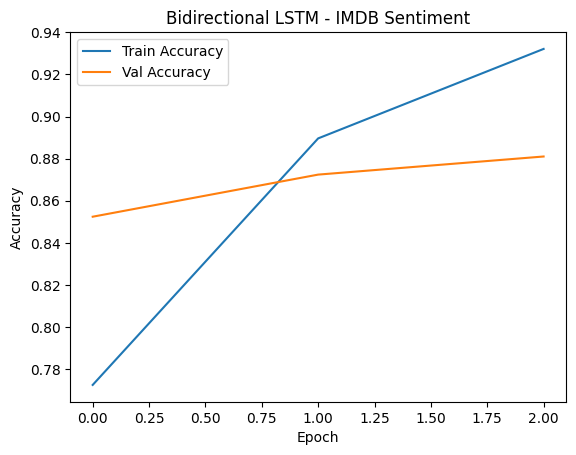

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Bidirectional LSTM - IMDB Sentiment")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()